In [32]:
import pandas as pd
import matplotlib.pyplot as plt


All Interactions Amount : 443.0
Average Interactions Per Scene Amount : 88.6


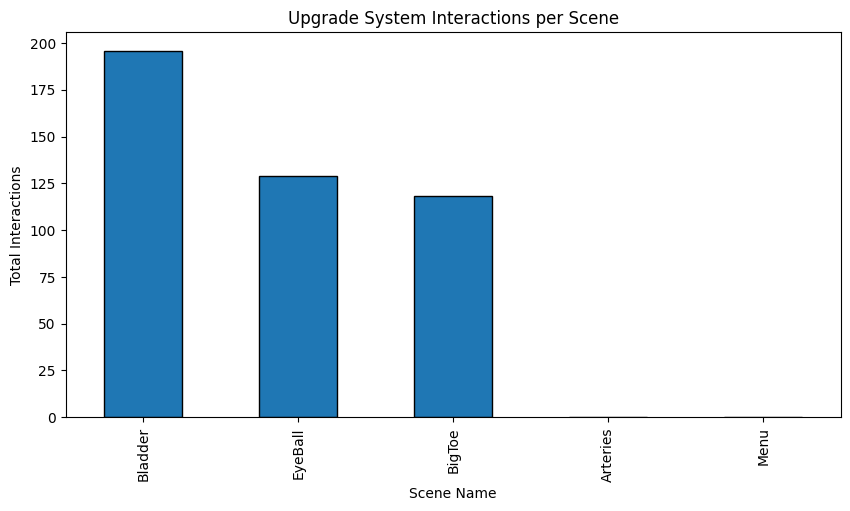

In [33]:
Data = pd.read_csv('downloaded_data.csv')

InteractionsPerScene = Data.groupby('sceneName')['UpgradeSystemInteractions'].sum()

AllInteractions = InteractionsPerScene.sum()
AverageInteractions = InteractionsPerScene.mean()
print(f"All Interactions Amount : {AllInteractions}")
print(f"Average Interactions Per Scene Amount : {AverageInteractions}")

plt.figure(figsize=(10,5))
InteractionsPerScene.sort_values(ascending=False).plot(kind='bar', edgecolor='black')
plt.title('Upgrade System Interactions per Scene')
plt.xlabel('Scene Name')
plt.ylabel('Total Interactions')
plt.show()


# Upgrade System Interactions

## Findings

- **Bladder** had the highest number of Upgrade System interactions, with nearly 200 total interactions.
- **EyeBall** and **BigToe** both had a similar amount of interactions, they are tutorial levels and usually have little possibility of upgrading
- **Arteries** currently has fewer interactions then the Bladder because it is a newer play scene.
- **Menu** Had no interactions as the Upgrade System is not available there
## Interpretation

- **Bladder** heavily reliant on player upgrades it seems players believed upgrades in the scene are most valuble
- **EyeBall** and **BigToe** showed little interactions, they are tutorial scene and players seemed to only get the hang of player upgrade interactions in them.

## Potential Actions
- **Tutorial** upgrade prompts or tutorials in lower interaction scenes.

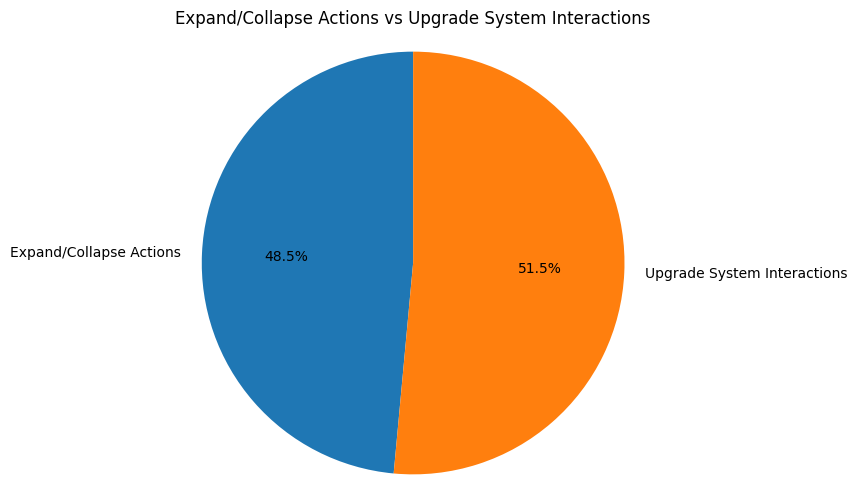

In [34]:
ExpandedOrCollapsedTotal = Data['UpgradeSystemExpandedOrCollapsed'].sum()
UpgradeInteractionsCount = Data['UpgradeSystemInteractions'].sum()
UpgradeInteractionsCount = UpgradeInteractionsCount - ExpandedOrCollapsedTotal

actions = pd.Series({
    'Expand/Collapse Actions': ExpandedOrCollapsedTotal,
    'Upgrade System Interactions': UpgradeInteractionsCount
})

plt.figure(figsize=(6,6))
plt.pie(actions, labels=actions.index, autopct='%1.1f%%', startangle=90)
plt.title('Expand/Collapse Actions vs Upgrade System Interactions')
plt.axis('equal')
plt.show()

## Expand/Collapse Actions vs Upgrade System Interactions

This chart compares the total number of panel expand/collapse actions with the total number of upgrade system interactions.

### Insights:
- There is a near 50/50 split between expanding/collapsing and applying upgrades. This could mean that the UI doesnt take too much space on screen as 2 Expand/ Collapse interactions are needed to open the panel, pick an upgrade and close the panel again. This data suggests that a lot of people seem to be leave the panel open as they use the upgrades in the game

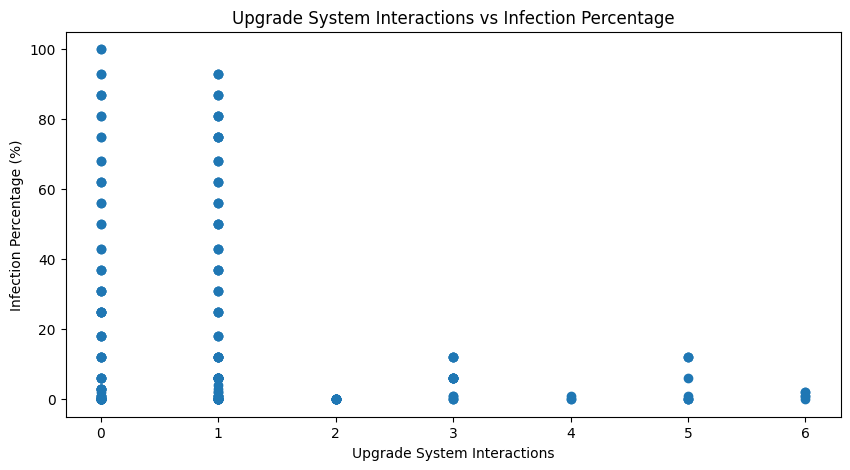

In [35]:
InteractionAndInfectionData = Data.dropna(subset=['UpgradeSystemInteractions', 'InfectionPercentage'])

plt.figure(figsize=(10,5))
plt.scatter(InteractionAndInfectionData['UpgradeSystemInteractions'], InteractionAndInfectionData['InfectionPercentage'])
plt.title('Upgrade System Interactions vs Infection Percentage')
plt.xlabel('Upgrade System Interactions')
plt.ylabel('Infection Percentage (%)')
plt.show()

## Upgrade System Interactions vs Infection Percentage

### Insights:
- There are many players which dont use the Upgrade System (High Infection Percentage with low Interaction Count)
- There is strong evidence that the upgrade power or level gaining needs to be improved as players are able to complete levels without using the upgrade system
- Tutorial might need to be improved in relation with Upgrade System as there seems to be players which might not be aware of the upgrade system
